# Example4: Rigid Water

We now move to look at the method for calculating three dimensional densities of rigid water molecules (for instance spce). When studying rigid water we treat the molecule as a single body as discussed in our paper published here: https://aip.scitation.org/doi/abs/10.1063/1.5111697 

In [1]:
from revelsmd import *
import numpy as np
import matplotlib.pyplot as plt
import MDAnalysis as md
%matplotlib inline

Again we generate a trajectory state. This is a case of an mdanalysis trajectory state as we use a gromacs trajectory. 

In [2]:
traj=TrajectoryStates.MDATrajectoryState('examples/example_4_rigid_water/forJoss.trr','examples/example_4_rigid_water/prodQUICKSNAP.tpr')

In [3]:
traj.mdanalysis_universe.atoms[0]

<Atom 1: Ow of type OW of resname SOL, resid 1 and segid seg_0_SOL>

## Calculating a force based 3D density

The three dimensional density part of the code is more involved than the RDF and requires the generation of two additional python objects. A GridState (in which the calculation is performed), and a SelectionState (which containd indexing information for the species we are indexing). Here we have the simplest example possible, and start by generating the grid state. If you use the trajectory included in this tutorial there will only be 8000 frames this the bottom limit for getting something useable.

This example repeats the water density calculation perfomed in the original paper, however, in this example we do not exclude the frozen water molecules, so a very strong peak will be located at the centre of mass of the molecule.

We start by generating a grid.

In [9]:
GS=RevelsMD3D.GridState(traj,'number',nbins=200,temperature=600)

We move to making the force grid. The fast gridding method we use here is based in numpy and seems to perform well against the codes in standard libraries

In [10]:
GS.make_force_grid(traj,['Ow','Hw1','Hw2'],kernel='box',rigid=True)

<function RevelsMD3D.Estimators.single_frame_rigid_number_com_grid at 0x7f96b87594d0>


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 8000/8000 [01:53<00:00, 70.78it/s]


In [11]:
GS.get_real_density()

(75.0, 125.0)

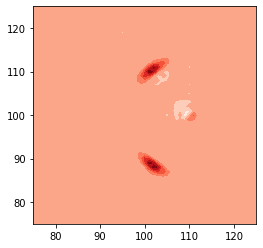

In [14]:
plt.figure(figsize=(4,4))
plt.contourf(GS.rho[:,:,100],cmap='Reds')
plt.ylim(75,125)
plt.xlim(75,125)

In [ ]:
GS_combined=GS.get_lambda(traj,8000)

 42%|█████████████████████████████████████▉                                                    | 3372/8000 [9:47:33<59:46:53, 46.50s/it]